<a href="https://colab.research.google.com/github/Young-Dong/nlp/blob/main/nlp100_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第7章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import word2vec

# official document https://radimrehurek.com/gensim/auto_examples/index.html#documentation

data = '/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(data, binary=True)

In [ ]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [ ]:
len(model['United_States'])

300

61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [ ]:
# https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html#gensim.models.Word2Vec
model.similarity("United_States", "U.S.")

0.73107743

62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
model.most_similar("United_States")

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

64. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
!wget 'http://download.tensorflow.org/data/questions-words.txt'

--2021-12-17 09:54:40--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.157.128, 2404:6800:4008:c13::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.157.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2021-12-17 09:54:41 (254 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
# transform to dataframe

import pandas as pd

df = pd.DataFrame()
with open('questions-words.txt') as f:
  for l in f:
    l = l.split()
    if l[0] == ':':
      category = l[1]
    else:
      tmp = pd.DataFrame([[category,l[0], l[1], l[2], l[3]]])
      df = pd.concat([df, tmp])

In [ ]:
df.head()

,0,1,2,3,4
0,capital-common-countries,Athens,Greece,Baghdad,Iraq
0,capital-common-countries,Athens,Greece,Bangkok,Thailand
0,capital-common-countries,Athens,Greece,Beijing,China
0,capital-common-countries,Athens,Greece,Berlin,Germany
0,capital-common-countries,Athens,Greece,Bern,Switzerland


In [ ]:
df['most_similar'] = [model.most_similar(positive=[x, y], negative=[z], topn=1)[0]
                               for x,y,z in zip(df[2],df[3],df[1])]

In [ ]:
df['word'] = [list(i)[0] for i in df['most_similar']]
df['percent'] = [list(i)[1] for i in df['most_similar']]
df.head()

,0,1,2,3,4,most_similar,word,percent
0,capital-common-countries,Athens,Greece,Baghdad,Iraq,"(Iraqi, 0.6351870894432068)",Iraqi,0.635187
0,capital-common-countries,Athens,Greece,Bangkok,Thailand,"(Thailand, 0.7137669324874878)",Thailand,0.713767
0,capital-common-countries,Athens,Greece,Beijing,China,"(China, 0.7235777974128723)",China,0.723578
0,capital-common-countries,Athens,Greece,Berlin,Germany,"(Germany, 0.6734622120857239)",Germany,0.673462
0,capital-common-countries,Athens,Greece,Bern,Switzerland,"(Switzerland, 0.4919748306274414)",Switzerland,0.491975


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/df.csv')

65. アナロジータスクでの正解率P

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [2]:
# 1. semantic analogy: what is the word that is similar to France in the same sense as Berlin is similar to Germany?
# 2. syntactic analogy: what is the word that is similar to small in the same sense as biggest is similar to big?
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df.csv')
df['0'].value_counts()

capital-world                  4524
city-in-state                  2467
gram6-nationality-adjective    1599
gram7-past-tense               1560
gram3-comparative              1332
gram8-plural                   1332
gram4-superlative              1122
gram5-present-participle       1056
gram1-adjective-to-adverb       992
gram9-plural-verbs              870
currency                        866
gram2-opposite                  812
family                          506
capital-common-countries        506
Name: 0, dtype: int64

In [ ]:
df[df['0']=='gram2-opposite'].head(2)

,Unnamed: 0,0,1,2,3,4,most_similar,word,percent
9861,0,gram2-opposite,acceptable,unacceptable,aware,unaware,"('unaware', 0.6383266448974609)",unaware,0.638327
9862,0,gram2-opposite,acceptable,unacceptable,certain,uncertain,"('unjustified', 0.4622364938259125)",unjustified,0.462236


In [ ]:
df[df['0']=='capital-common-countries'].head(2)

,Unnamed: 0,0,1,2,3,4,most_similar,word,percent
0,0,capital-common-countries,Athens,Greece,Baghdad,Iraq,"('Iraqi', 0.6351870894432068)",Iraqi,0.635187
1,0,capital-common-countries,Athens,Greece,Bangkok,Thailand,"('Thailand', 0.7137669324874878)",Thailand,0.713767


In [ ]:
df_syntactic = df[df['0'].str.contains('gram')]
df_semantic = df[~df['0'].str.contains('gram')]
print('semantic analogy: ', df_semantic[df_semantic['4']==df_semantic['word']].shape[0]/df_semantic.shape[0])
print('syntactic analogy: ', df_syntactic[df_syntactic['4']==df_syntactic['word']].shape[0]/df_syntactic.shape[0])

semantic analogy:  0.7308602999210734
syntactic analogy:  0.7400468384074942


66. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
!wget 'https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip'

--2021-12-20 10:32:31--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.04s   

2021-12-20 10:32:32 (535 KB/s) - ‘wordsim353.zip’ saved [23257/23257]



In [ ]:
import zipfile
import pandas as pd

with zipfile.ZipFile('wordsim353.zip') as existing_zip:
  print(existing_zip.namelist())
  df_ = pd.read_csv(existing_zip.open('combined.csv'))

['combined.csv', 'set1.csv', 'set2.csv', 'combined.tab', 'set1.tab', 'set2.tab', 'instructions.txt']


In [ ]:
df_.head(2)

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35


In [ ]:
df_['similar'] = [model.similarity(x,y) for x,y in zip(df_['Word 1'],df_['Word 2'])]
df_.head()

,Word 1,Word 2,Human (mean),similar
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.363463
4,computer,keyboard,7.62,0.396392


In [ ]:
df_['Human (mean)'].corr(df_['similar'], method='spearman')

0.7000166486272194

In [ ]:
df_['Human (mean)'].corr(df_['similar'], method='pearson')

0.6525349607550167

In [ ]:
df_['Human (mean)'].corr(df_['similar'], method='kendall')

0.5103771286082057

67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [3]:
df_1 = df[df['0'].isin(['capital-common-countries', 'capital-world'])]
df_2 = df[df['0'].isin(['currency', 'gram6-nationality-adjective'])]
c = set(df_1['2']) | set(df_1['4']) | set(df_2['1']) | set(df_2['3'])
len(c)

129

In [4]:
c_v = model[c]
c_v.shape

(129, 300)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
pred = kmeans.fit_predict(c_v)

In [6]:
df_c = pd.DataFrame()
df_c['countries'], df_c['pred'] = list(c), pred
df_c['pred'].value_counts()

4    32
2    30
1    26
0    22
3    19
Name: pred, dtype: int64

In [7]:
df_c

,countries,pred
0,Namibia,2
1,Laos,4
2,USA,0
3,Switzerland,0
4,Eritrea,2
...,...,...
124,Zimbabwe,2
125,Venezuela,3
126,Iraq,4
127,Slovenia,1


68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

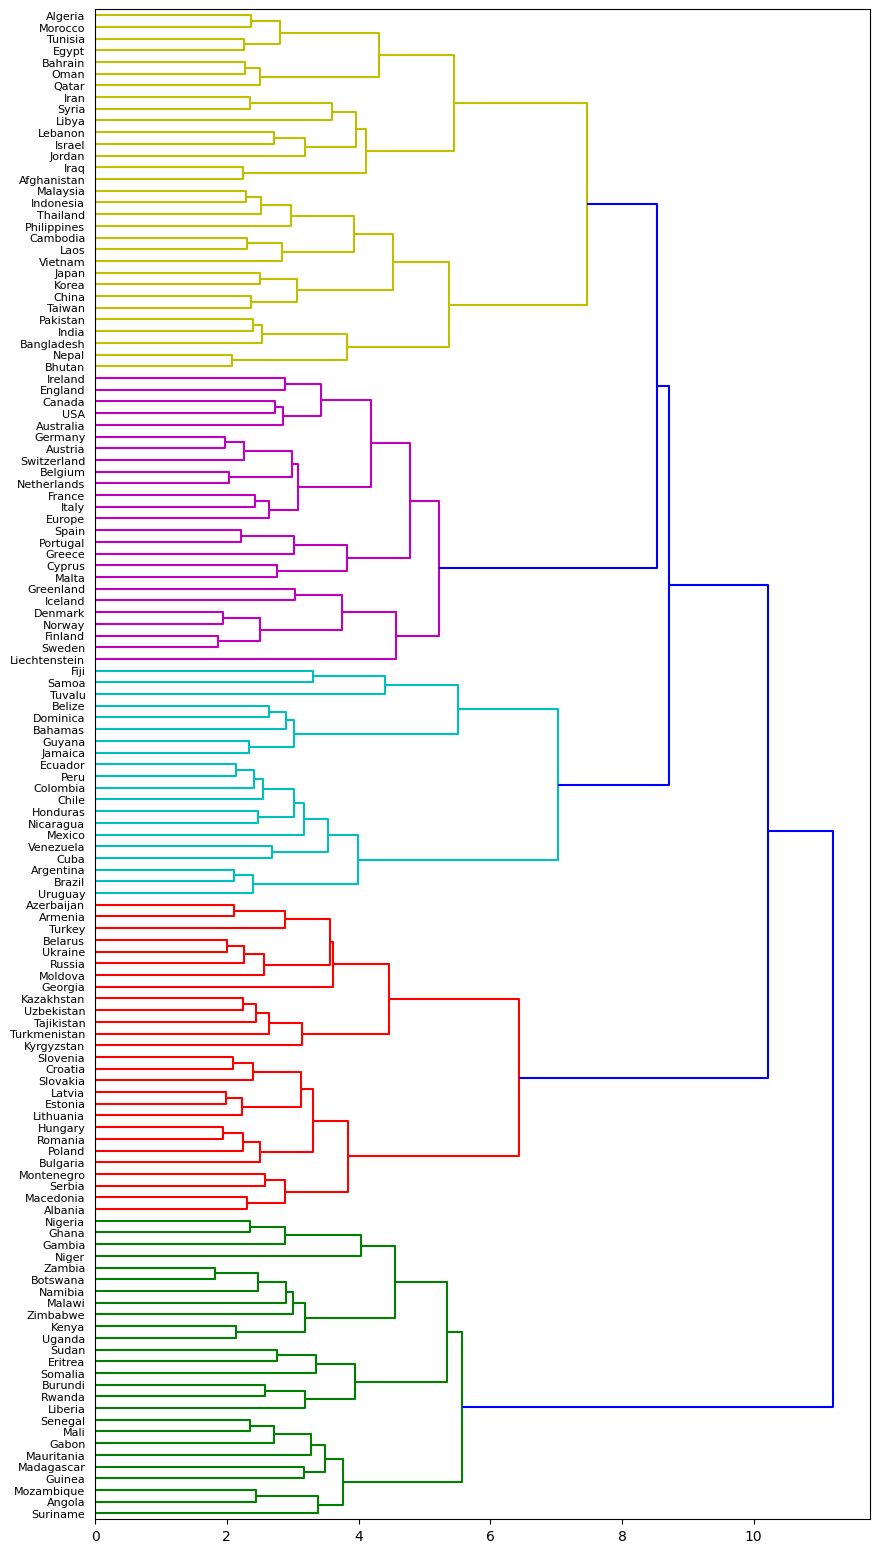

In [51]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(c_v)

# create the counts of samples under each node
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]
    ).astype(float)

# Plot the corresponding dendrogram
plt.figure(figsize=(10, 20), dpi=100)
dendrogram(linkage_matrix, labels=list(df_c['countries']), orientation='right', leaf_font_size=8)
plt.show()

69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


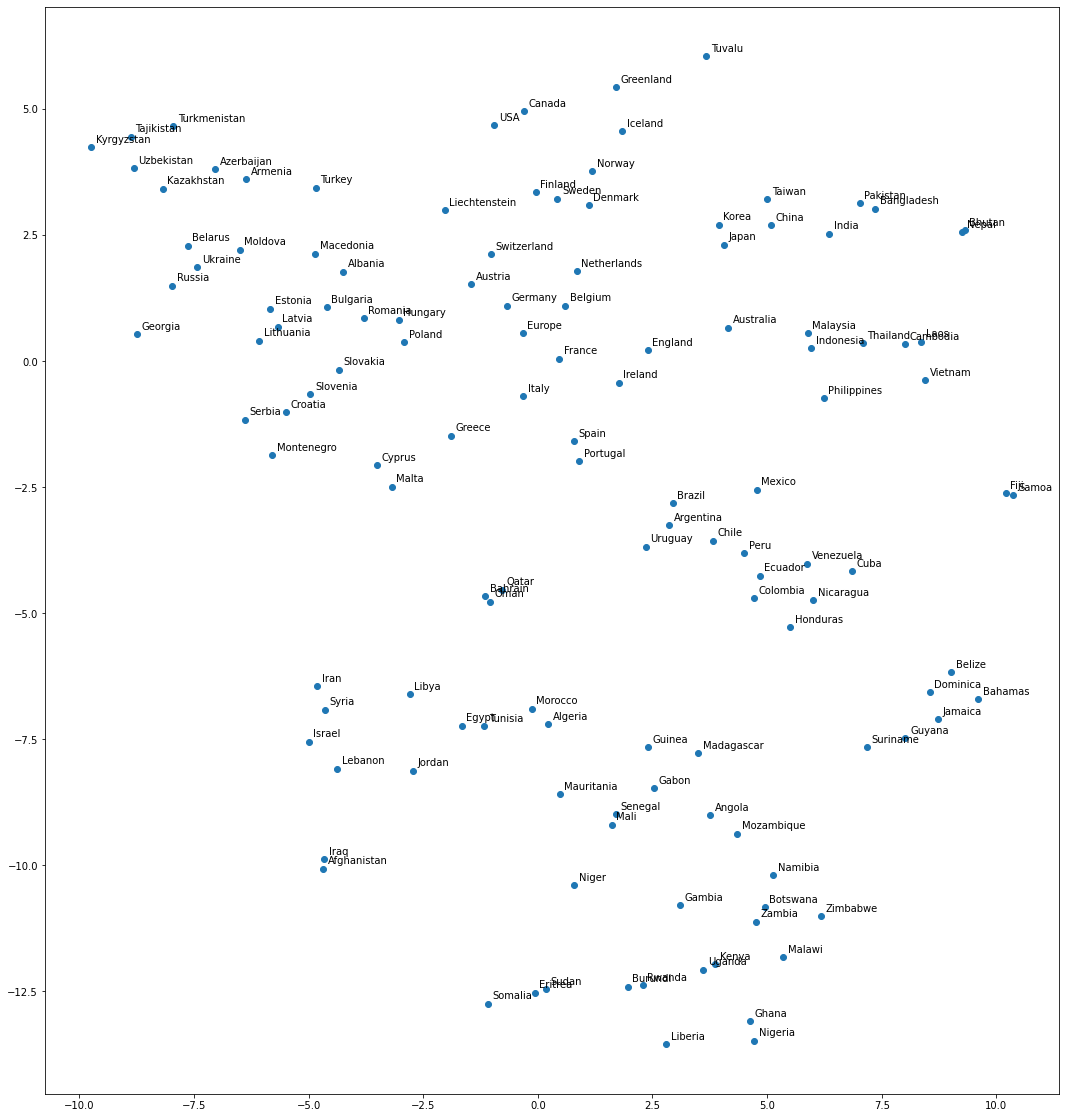

In [61]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(c_v)
txt = df_c['countries']
x, y = X_tsne[:, 0], X_tsne[:, 1]

plt.figure(figsize=(40, 20))
plt.subplot(121)
plt.scatter(x, y)
for i in range(len(txt)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i]+0.1, y[i]+0.1))
plt.show()